In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
def vector_field(b_max,w_max,num_b=20,num_w=20):
    b_field = numpy.linspace(0,b_max,num_b)
    w_field = numpy.linspace(0,w_max,num_w)
    b_vector = numpy.zeros([num_b,num_w])
    w_vector = numpy.zeros([num_b,num_w])
    for w_lupe in range(w_field.shape[0]):
        for b_lupe in range(b_field.shape[0]):
            w = w_field[w_lupe]
            b = b_field[b_lupe]
            b_vector[w_lupe][b_lupe] = theta*b*(1-b)-theta*w*b/(c+b)
            w_vector[w_lupe][b_lupe] = -w + theta*a*w*b/(c+b)
            length = numpy.sqrt(b_vector[w_lupe][b_lupe]*b_vector[w_lupe][b_lupe]+
                                w_vector[w_lupe][b_lupe]*w_vector[w_lupe][b_lupe])
            if(numpy.fabs(length)>1e-5):
                b_vector[w_lupe][b_lupe] /= length
                w_vector[w_lupe][b_lupe] /= length

    return([b_field,w_field,b_vector,w_vector])



In [9]:
a = 3.0
c = 3.0
theta = 10.0

b_max = 2
w_max = 3
b_plot = numpy.linspace(0,b_max,100)
w_plot = numpy.linspace(0,w_max,100)

b_nullcline_one = numpy.array([b_plot,(1.0-b_plot)*(c+b_plot)])
b_nullcline_two = numpy.array([[0.0,0.0],[0.0,w_max]])

w_nullcline_one = numpy.array([[c/(theta*c-1),c/(theta*c-1)],[0.0,w_max]])
w_nullcline_two = numpy.array([[0.0,b_max],[0.0,0.0]])

[b_field,w_field,b_vector,w_vector] = vector_field(b_max,w_max,20,20)



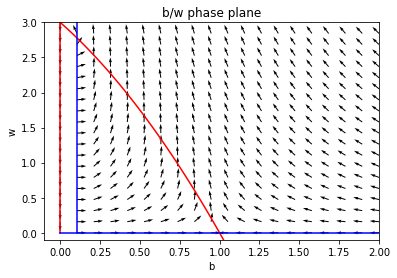

In [10]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.set_xlabel("b")
axes.set_ylabel("w")
axes.set_title("b/w phase plane")
#axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.set_xlim(-0.1, b_max)
axes.set_ylim(-0.1, w_max)

axes.plot(b_nullcline_one[0],b_nullcline_one[1],'r')
axes.plot(b_nullcline_two[0],b_nullcline_two[1],'r')

axes.plot(w_nullcline_one[0],w_nullcline_one[1],'b')
axes.plot(w_nullcline_two[0],w_nullcline_two[1],'b')

axes.quiver(b_field,w_field,b_vector,w_vector)

plt.show()